<a href="https://colab.research.google.com/github/anmolzz-10/Code_Clause_Intern_Projects/blob/Code_Clause_Intern_Project3/Code_Clause_intern_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
print("Dataset Information:")
print(df.head())
print("\nDataset Shape:", df.shape)

Dataset Information:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Shape: (303, 14)


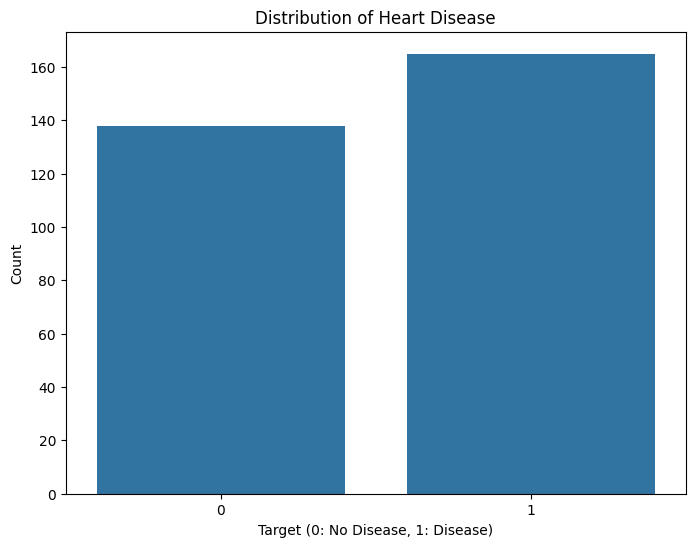

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.show()

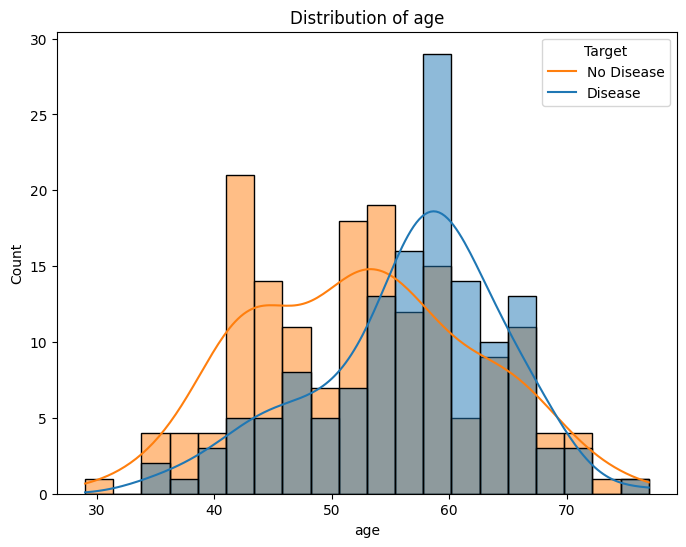

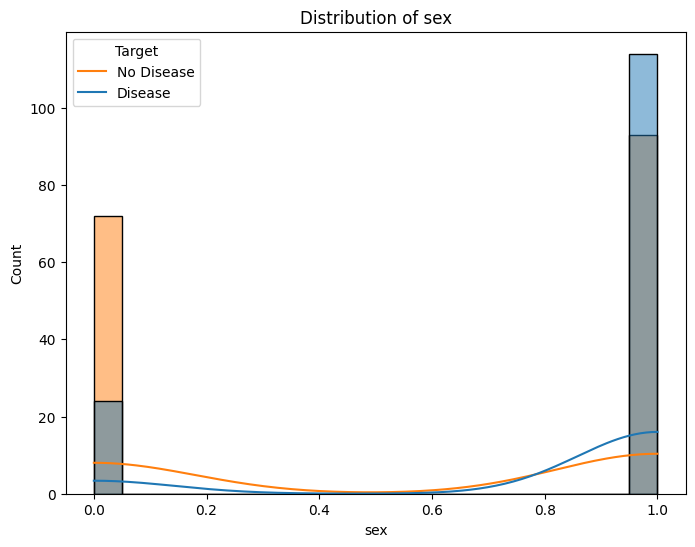

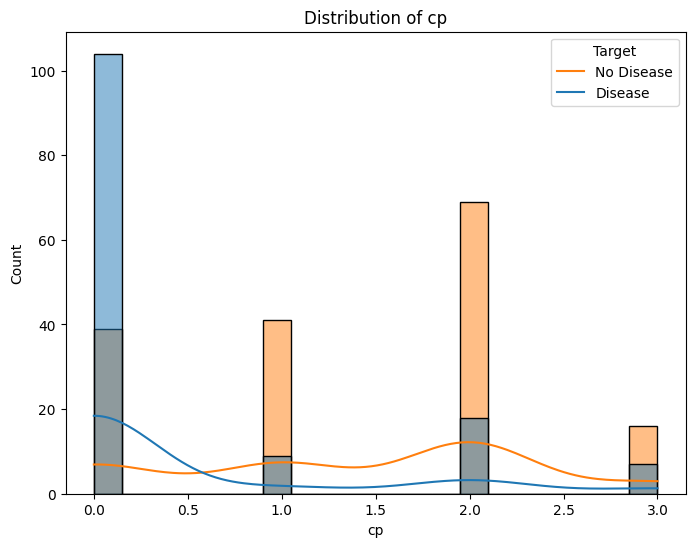

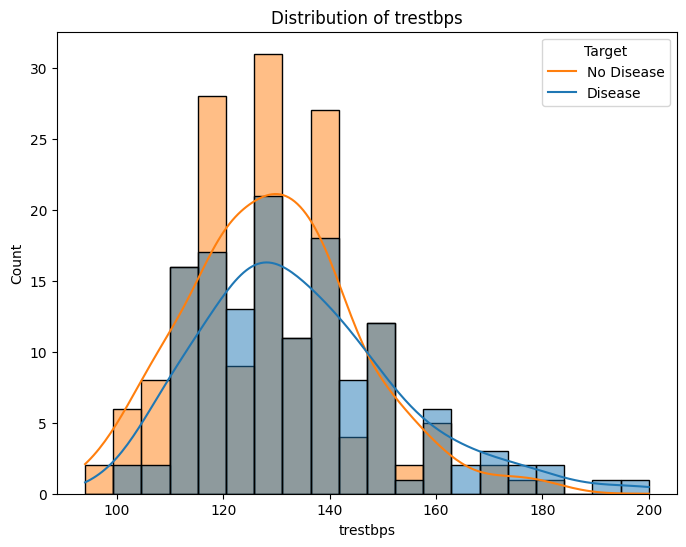

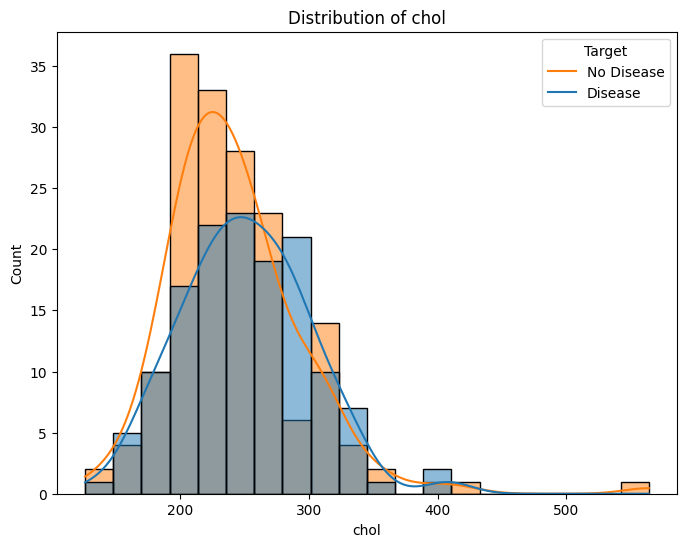

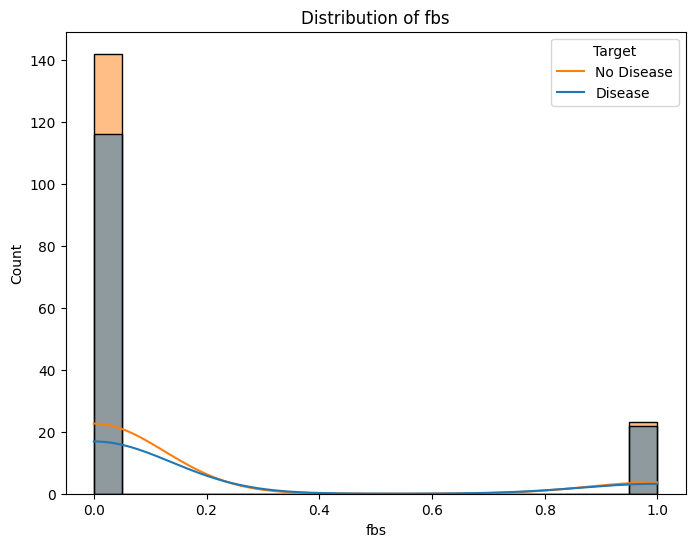

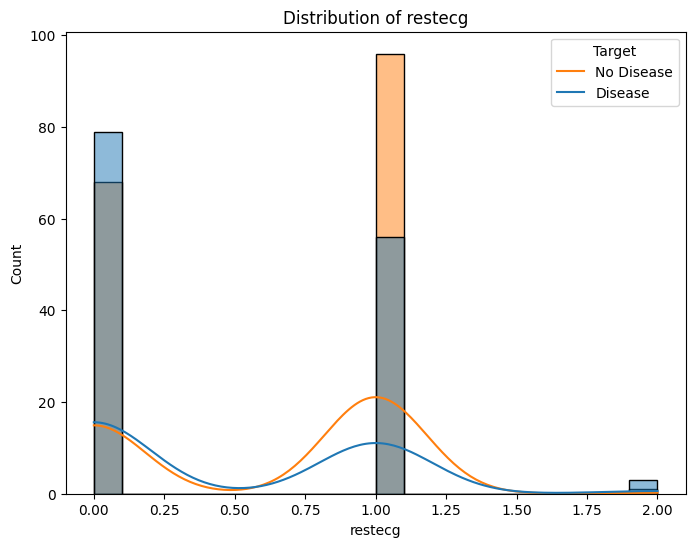

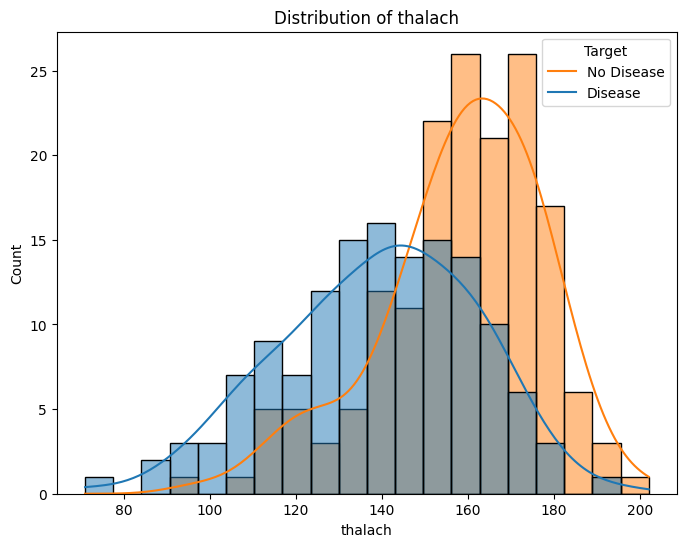

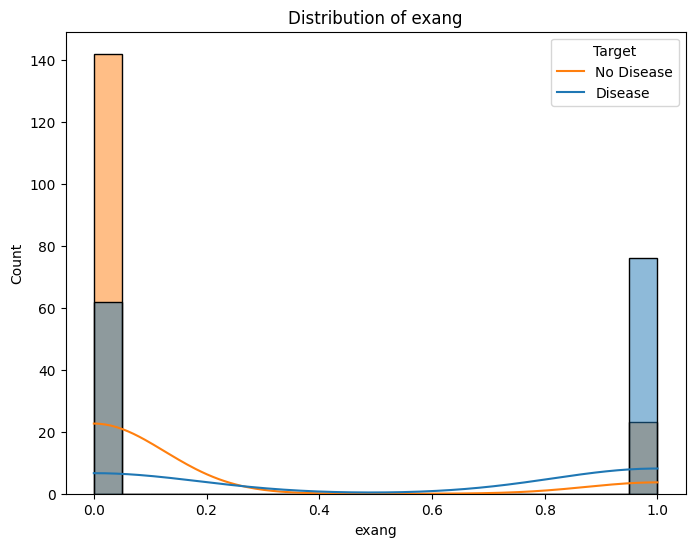

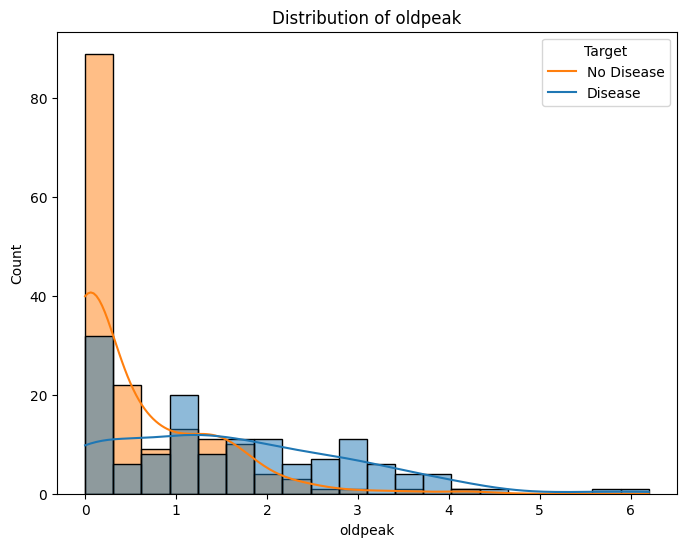

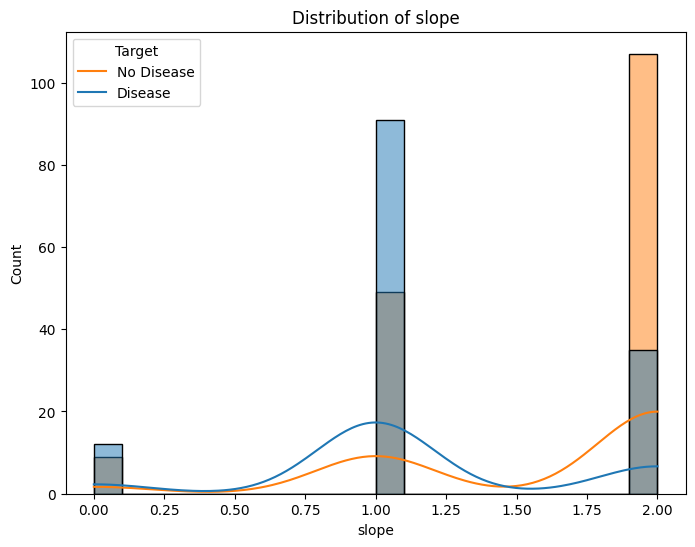

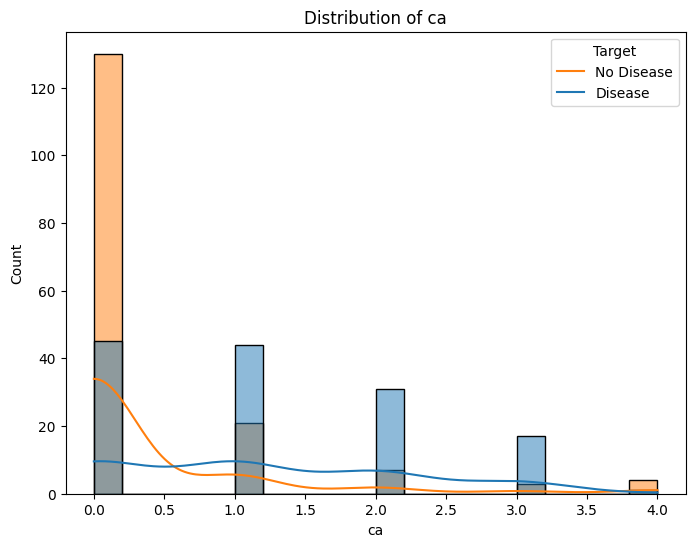

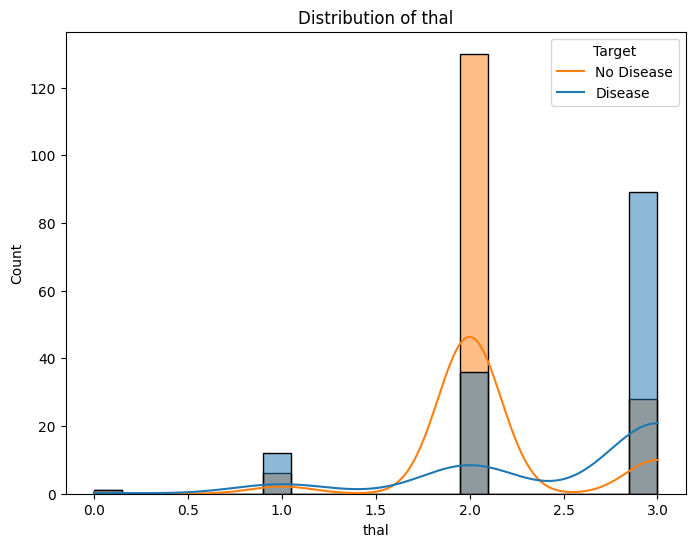

In [ ]:
for feature in df.columns:
    if feature != 'target':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=feature, hue='target', kde=True, bins=20)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Target', labels=['No Disease', 'Disease'])
        plt.show()

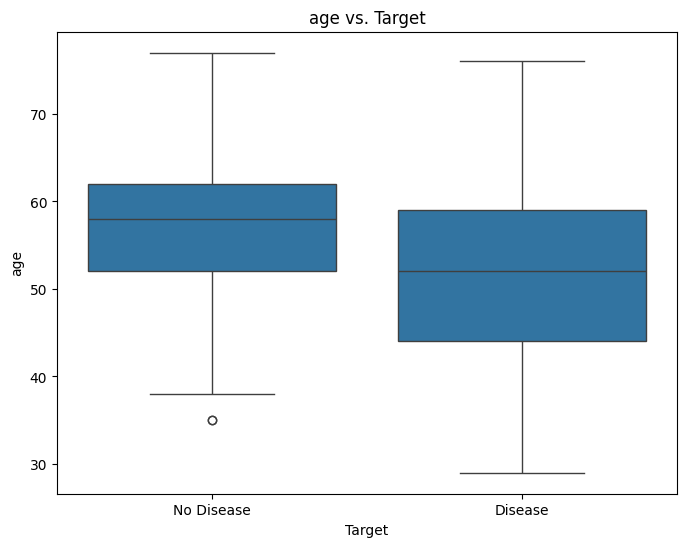

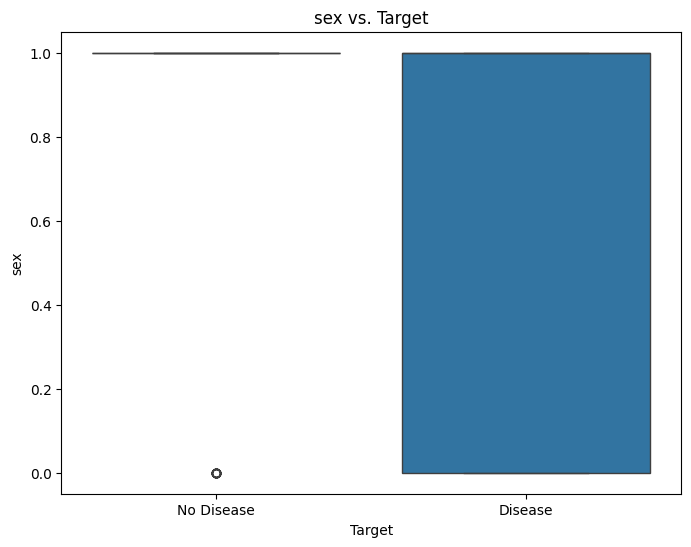

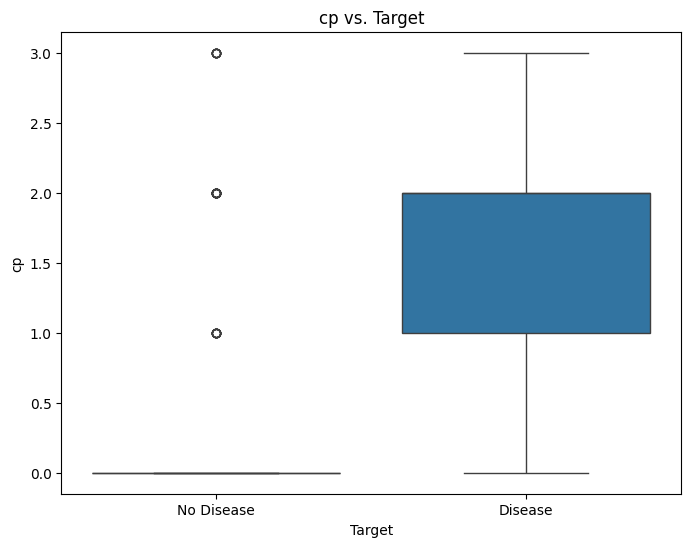

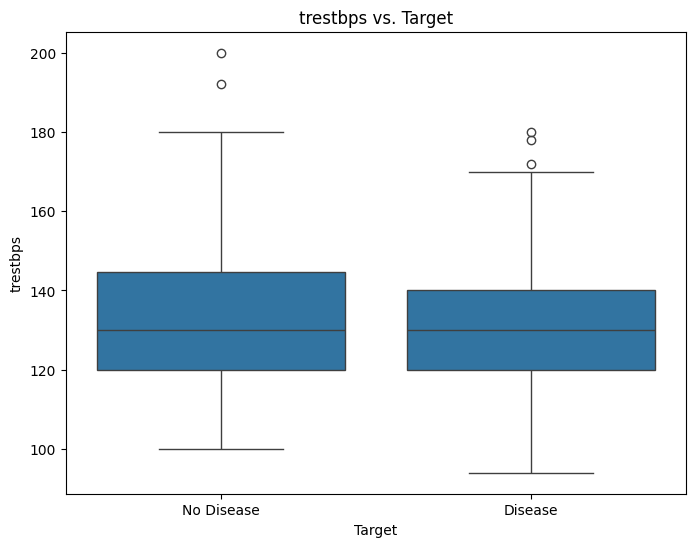

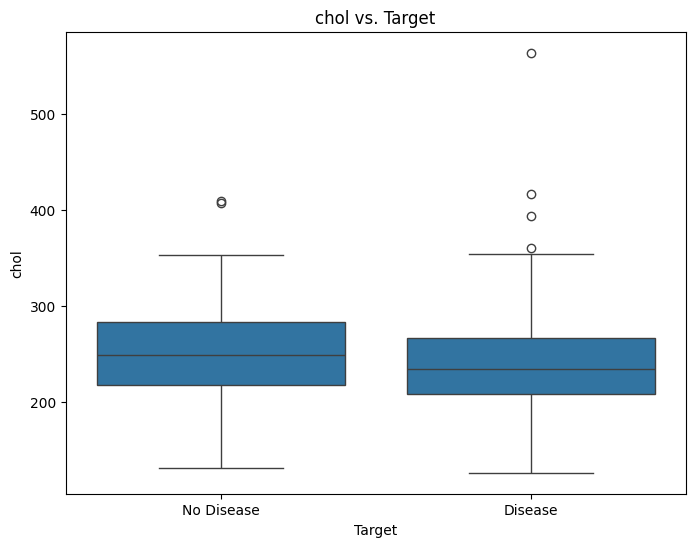

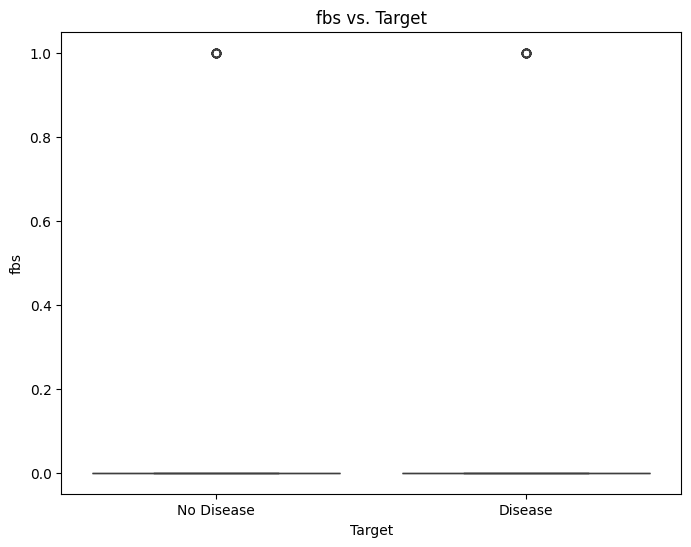

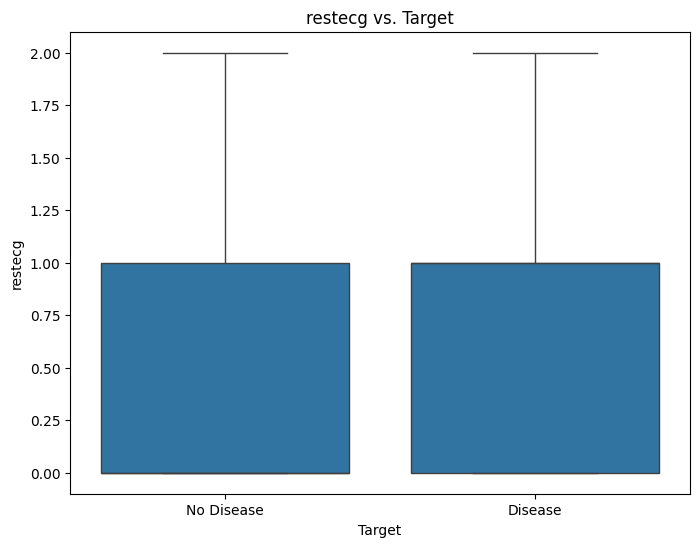

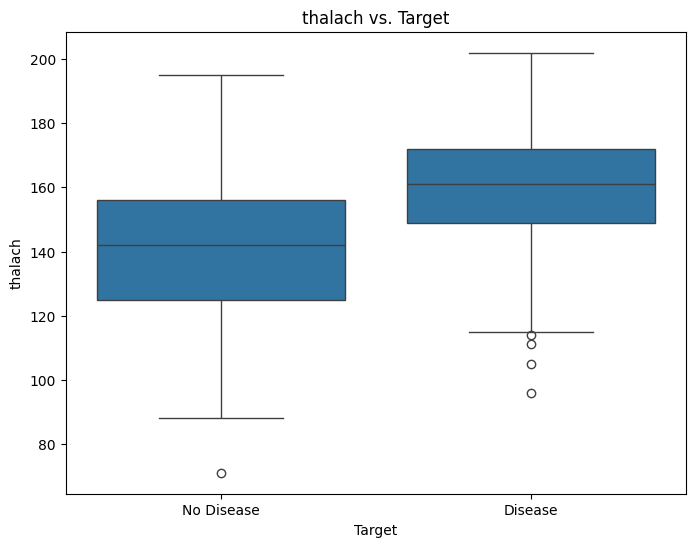

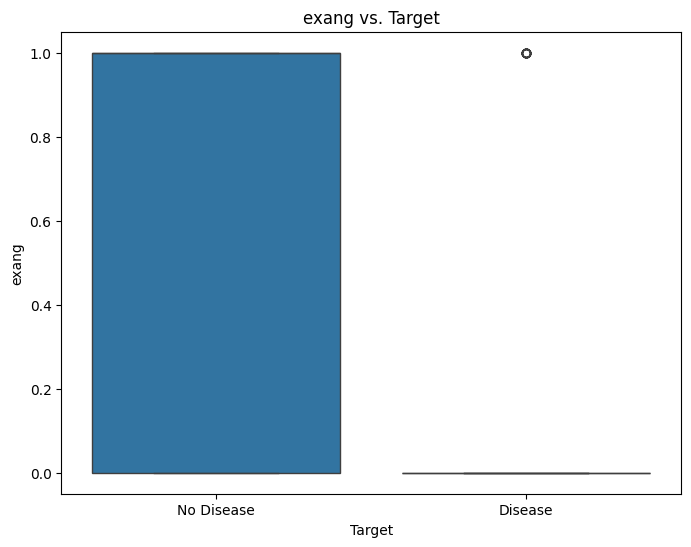

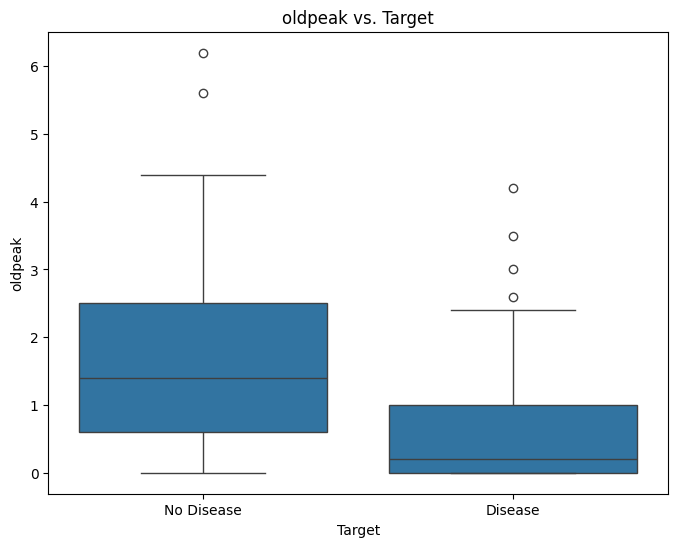

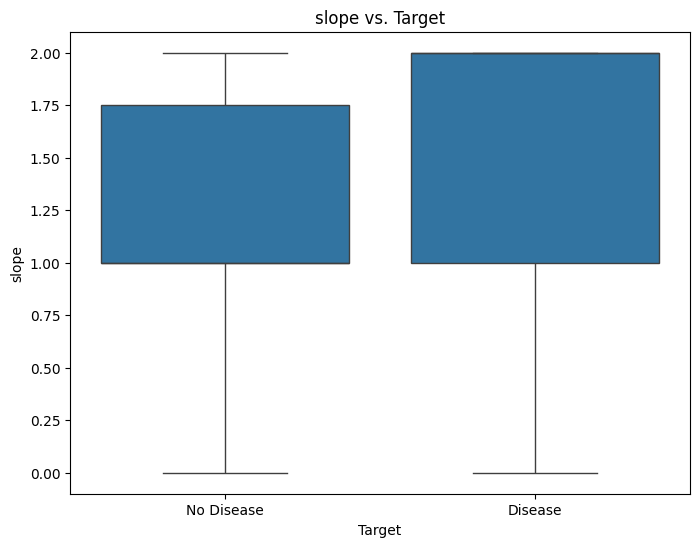

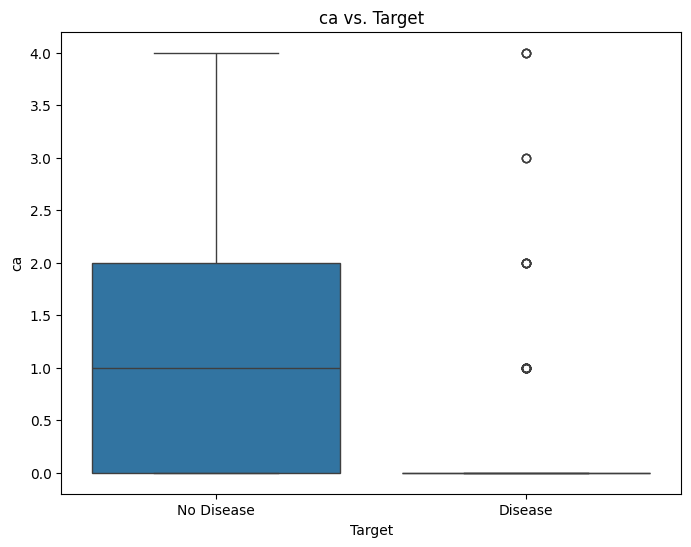

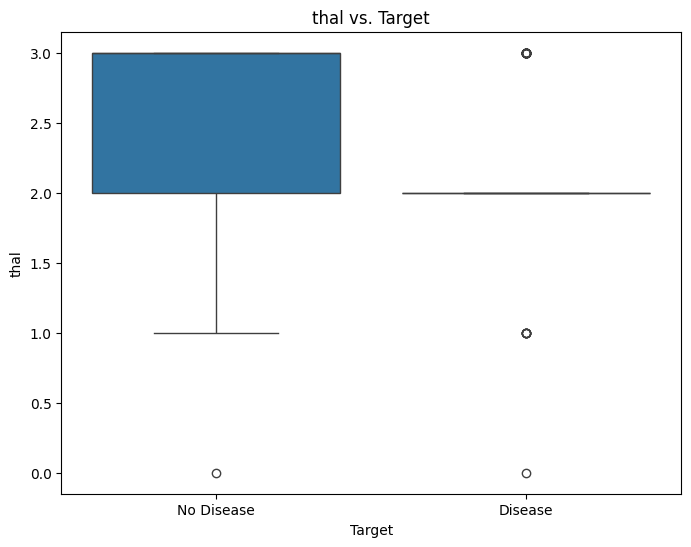

In [ ]:
for feature in df.columns:
    if feature != 'target':
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x='target', y=feature)
        plt.title(f'{feature} vs. Target')
        plt.xlabel('Target')
        plt.ylabel(feature)
        plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
        plt.show()

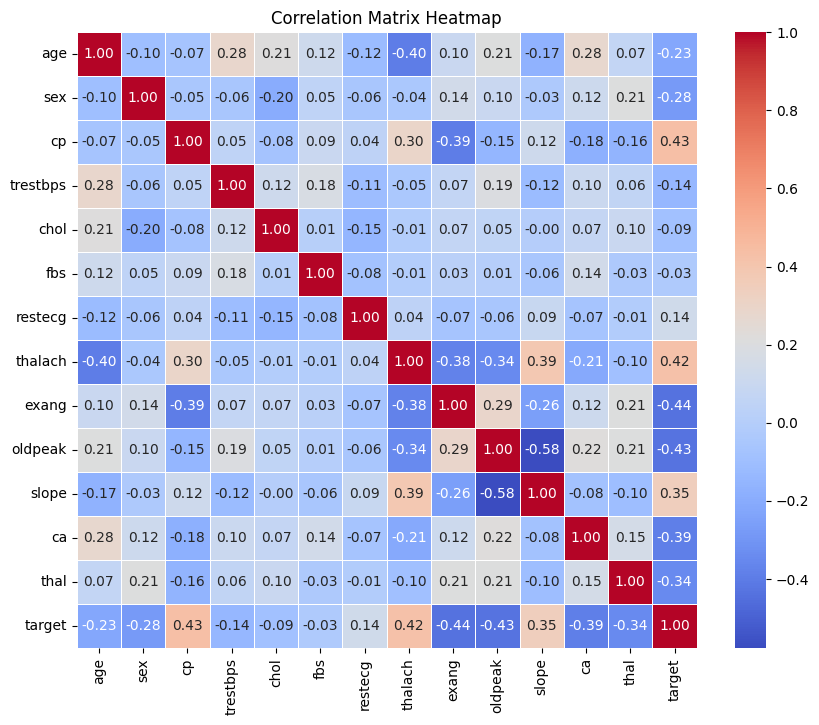

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from xgboost import XGBClassifier

In [ ]:
logistic_reg = LogisticRegression(random_state=42)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)

In [ ]:
gbm_classifier = GradientBoostingClassifier(random_state=42)

In [ ]:
xgb_classifier = XGBClassifier(random_state=42)

In [ ]:
models = [
    ("Logistic Regression", logistic_reg),
    ("Random Forest", random_forest),
    ("Support Vector Machine", svm_classifier),
    ("Gradient Boosting Machine", gbm_classifier),
    ("XGBoost", xgb_classifier)
]

In [ ]:
voting_classifier = VotingClassifier(estimators=models, voting='hard')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# Define function for model evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Cross-Validation Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [ ]:
# Evaluate each model
for name, model in models + [("Voting Classifier", voting_classifier)]:
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)


Model: LogisticRegression
Cross-Validation Mean Accuracy: 0.8180
Test Accuracy: 0.8525

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix:
[[25  4]
 [ 5 27]]

Model: RandomForestClassifier
Cross-Validation Mean Accuracy: 0.8058
Test Accuracy: 0.8361

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
[[24  5]
 [ 5 27]]

Model: SVC
Cross-Validation Mean Accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Initialize the SVM classifier
svm_classifier_tuned = SVC(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_classifier_tuned, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_svm_model = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
final_model = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
final_model.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01, random_state=42)

In [ ]:
final_svm_model_accuracy = final_model.score(X_test_scaled, y_test)
print("Final SVM Model Test Accuracy:", final_svm_model_accuracy)

Final SVM Model Test Accuracy: 0.8524590163934426


In [ ]:
# Get support vectors
support_vectors = final_model.support_vectors_

# Get indices of support vectors
support_vector_indices = final_model.support_

# Analyze support vectors and their corresponding labels
support_vector_labels = y_train.iloc[support_vector_indices]

# Print support vector information
print("Number of Support Vectors:", len(support_vectors))
print("Support Vector Labels:", support_vector_labels)

Number of Support Vectors: 107
Support Vector Labels: 196    0
177    0
258    0
287    0
282    0
      ..
99     1
121    1
20     1
71     1
106    1
Name: target, Length: 107, dtype: int64


In [ ]:
import joblib
joblib.dump(final_model, 'model.pkl')

['model.pkl']